In [2]:
#  Exploratory Data Analysis on Retail Sales Dataset
# Internship Task – TechNest

In [5]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Set Style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
# Load Dataset
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
 10  Year              1000 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(5), object(3)
memory usage: 78.3+ KB


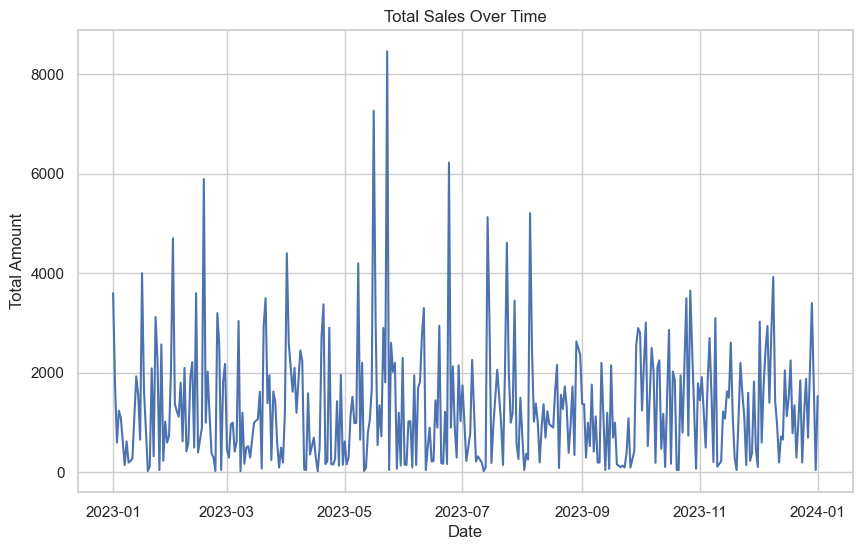

In [9]:
# Total Sales Over Time
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()
sns.lineplot(x='Date', y='Total Amount', data=sales_over_time)
plt.title('Total Sales Over Time')
plt.show()


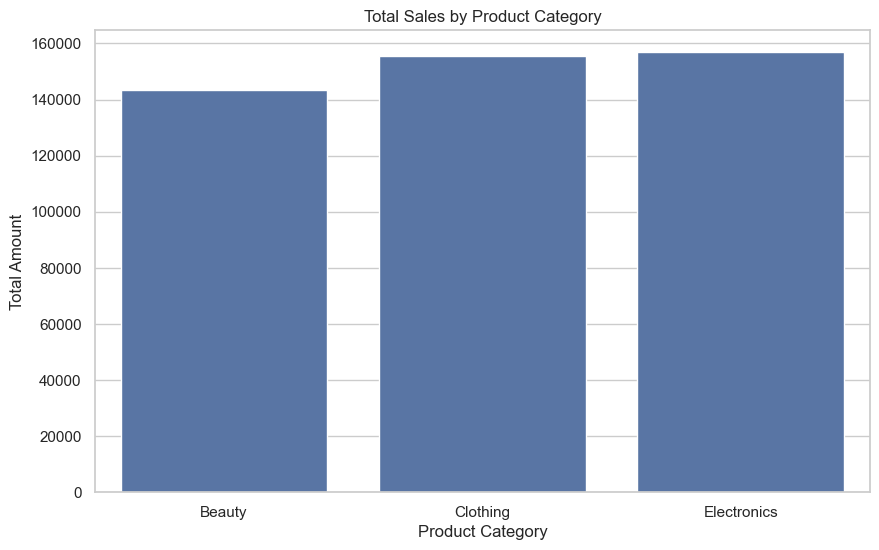

In [10]:
# Sales by Product Category
category_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()
sns.barplot(x='Product Category', y='Total Amount', data=category_sales)
plt.title('Total Sales by Product Category')
plt.show()

In [11]:
# Average Order Value (AOV)
aov = df['Total Amount'].mean()
print(f'Average Order Value: ₹{aov:.2f}')

Average Order Value: ₹456.00


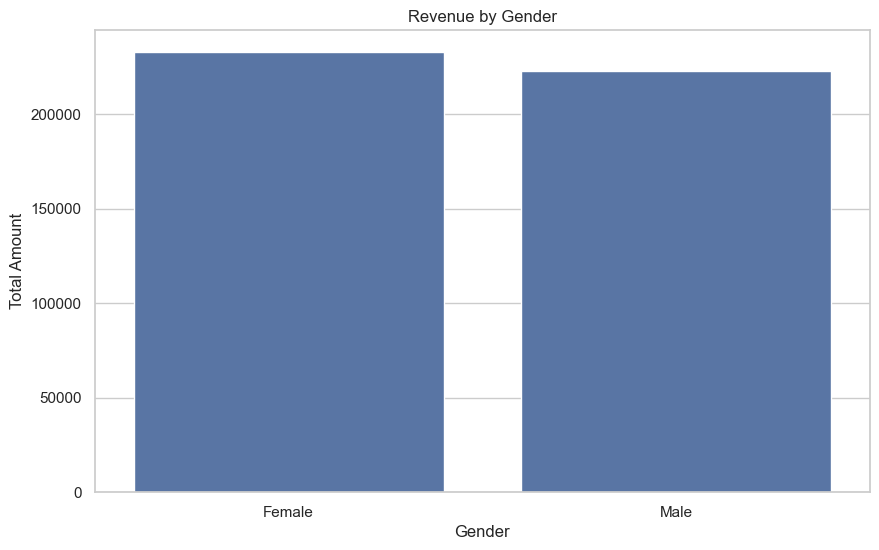

In [12]:
# 🢑 Revenue by Gender
gender_revenue = df.groupby('Gender')['Total Amount'].sum().reset_index()
sns.barplot(x='Gender', y='Total Amount', data=gender_revenue)
plt.title('Revenue by Gender')
plt.show()


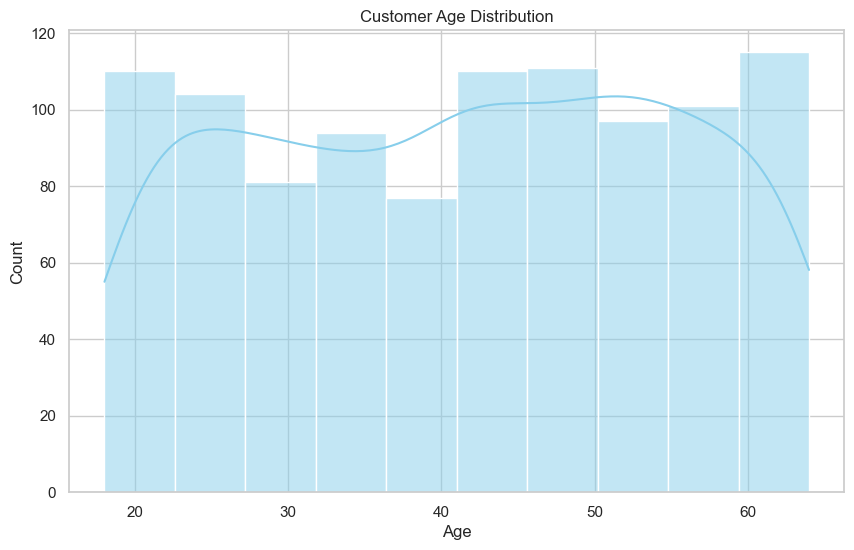

In [13]:
#Customer Age Distribution
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.show()


C:\Users\tause\AppData\Local\Temp\ipykernel_4748\4232945091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Customer ID', x='Total Amount', data=top_customers, palette='magma')


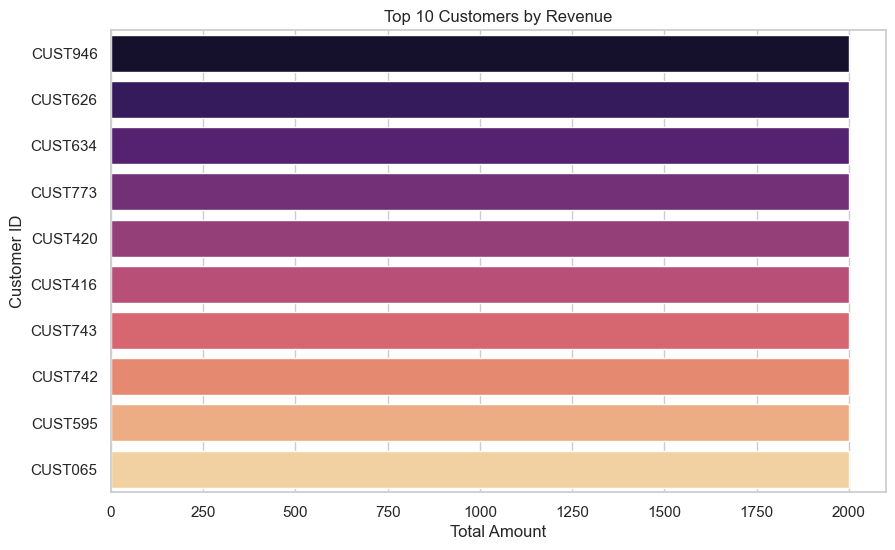

In [14]:
# Top 10 Customers by Revenue
top_customers = df.groupby('Customer ID')['Total Amount'].sum().reset_index()
top_customers = top_customers.sort_values(by='Total Amount', ascending=False).head(10)
sns.barplot(y='Customer ID', x='Total Amount', data=top_customers, palette='magma')
plt.title('Top 10 Customers by Revenue')
plt.show()

In [16]:
# Conclusion
print("""
Key Insights:
- Sales peaked during specific dates indicating possible seasonality.
- Clothing and Electronics are the highest revenue-generating categories.
- Males slightly outspent females, suggesting targeted marketing may be adjusted.
- Average Order Value (AOV) is useful for customer value estimation.
- Top customers contribute significantly to total revenue; loyalty programs can help retain them.

This analysis helps identify valuable patterns and informs strategic decisions in marketing and operations.
""")


Key Insights:
- Sales peaked during specific dates indicating possible seasonality.
- Clothing and Electronics are the highest revenue-generating categories.
- Males slightly outspent females, suggesting targeted marketing may be adjusted.
- Average Order Value (AOV) is useful for customer value estimation.
- Top customers contribute significantly to total revenue; loyalty programs can help retain them.

This analysis helps identify valuable patterns and informs strategic decisions in marketing and operations.

